In [1]:
## Till now : 7 lectures ( 1 hr 22 mins)

## Next update : 11 lectures ( 1 hr 55 mins)

## 1.. Doing data cleaning / data Preparation : 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
global_temp_country = pd.read_csv(r'F:\Time_series_Analysis\2. Global_Warming\Dataset/GlobalLandTemperaturesByCountry.csv')

In [4]:
global_temp_country.head(2)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland


In [5]:
global_temp_country.shape

(577462, 4)

#### how to clean/prepare/pre-process data :
    a.. remove duplicate rows
    b.. remove irrelevant data.
    c.. Fix structural errors.
    d.. check missing values in data
    e.. check data-type of each feature is right or not..
    f.. deal with the outliers

In [6]:
## let me check it out whether we have duplicacy in country names or not 
## bcz same country could be written using various names :

#eg ..'Denmark (Europe)', 'Denmark' both are same as Denmark is already a European country hence no need to mention Europe here.

In [7]:
## before checking duplicacy in country , first u have to make sure that there must not be any NAN in country feature ..

In [8]:
global_temp_country.isna().sum()
## global_temp_country.isnull().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [9]:
## drop missing data
# global_temp_country.dropna(subset=['AverageTemperature'],inplace=True)
##global_temp_country.dropna(axis='index',how='any', subset=['AverageTemperature'],inplace=True)

In [10]:
### Lets check whether there is a duplicate value in country or not ! 

In [11]:
global_temp_country['Country'].unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecu

In [12]:
global_temp_country['Country'].nunique()


243

In [13]:
duplicate_dict = {
      'Denmark (Europe)':'Denmark',
      'France (Europe)':'France',
      'Netherlands (Europe)':'Netherlands',
      'United Kingdom (Europe)':'United Kingdom',
      'Congo (Democratic Republic Of The)':'Congo'
}

In [14]:
global_temp_country['Country'] = global_temp_country['Country'].replace(duplicate_dict)

In [15]:
global_temp_country['Country'].nunique()

238

## 2.. Dealing with duplicate rows 

In [16]:
global_temp_country.duplicated().sum() ## ie there are no duplicated entries ..

361

In [17]:
global_temp_country.shape

(577462, 4)

In [18]:
global_temp_country = global_temp_country.drop_duplicates()

In [19]:
global_temp_country.shape

(577101, 4)

In [20]:
global_temp_country.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
Country                           object
dtype: object

In [21]:
### we have discussed various data-types in the previous case-study !
## for those of you who have forgotten , let me explain in high level overview 

In [22]:
'''
Categorical data has : Object & bool data-types 
Numerical data have : Integer & Float data-type


Categorical data refers to a data type that can be stored into groups/categories/labels 
Examples of categorical variables are  age group, blood type etc.. 


Numerical data refers to the data that is in the form of numbers, 
Examples of numerical data are height, weight, age etc.. 

Numerical data has two categories: discrete data and continuous data


Discrete data : It basically takes countable numbers like 1, 2, 3, 4, 5, and so on. 
                age of a fly : 8 , 9 day etc..
                
Continuous data : which is continuous in nature 
                  amount of sugar , 11.2 kg  , temp of a city  , your bank balance !
                  


'''

'\nCategorical data has : Object & bool data-types \nNumerical data have : Integer & Float data-type\n\n\nCategorical data refers to a data type that can be stored into groups/categories/labels \nExamples of categorical variables are  age group, blood type etc.. \n\n\nNumerical data refers to the data that is in the form of numbers, \nExamples of numerical data are height, weight, age etc.. \n\nNumerical data has two categories: discrete data and continuous data\n\n\nDiscrete data : It basically takes countable numbers like 1, 2, 3, 4, 5, and so on. \n                age of a fly : 8 , 9 day etc..\n                \nContinuous data : which is continuous in nature \n                  amount of sugar , 11.2 kg  , temp of a city  , your bank balance !\n                  \n\n\n'

In [23]:
'''

Variations of int are : ('int64','int32','int16') in numpy library..


Int16 is a 16 bit signed integer , it means it can store both positive & negative values
int16 has has a range of  (2^15 − 1) to -2^15 
int16 has a length of 16 bits (2 bytes).. ie Int16 uses 16 bits 


Int32 is a 32 bit signed integer , it means it storesboth positive & negative values
int32 has has a range of (2³¹ − 1) to  -2^31
int32 has a length of 32 bits (4 bytes),, ie Int32 uses 32 bits


Int64 is a 64 bit signed integer , it means it can store both positive & negative values
int64 has has a range of  (2^63 − 1) to -2^63 
int64 has a length of 64 bits (8 bytes) , ie Int64 uses 64 bits.
             

The only difference is that int64 has max range of storing numbers , then comes int32 , then 16 , then int8

That means that Int64’s take up twice as much memory-and doing 
operations on them may be a lot slower in some machine architectures.

However, Int64’s can represent numbers much more accurately than 
32 bit floats.They also allow much larger numbers to be stored..

'''


"\n\nVariations of int are : ('int64','int32','int16') in numpy library..\n\n\nInt16 is a 16 bit signed integer , it means it can store both positive & negative values\nint16 has has a range of  (2^15 − 1) to -2^15 \nint16 has a length of 16 bits (2 bytes).. ie Int16 uses 16 bits \n\n\nInt32 is a 32 bit signed integer , it means it storesboth positive & negative values\nint32 has has a range of (2³¹ − 1) to  -2^31\nint32 has a length of 32 bits (4 bytes),, ie Int32 uses 32 bits\n\n\nInt64 is a 64 bit signed integer , it means it can store both positive & negative values\nint64 has has a range of  (2^63 − 1) to -2^63 \nint64 has a length of 64 bits (8 bytes) , ie Int64 uses 64 bits.\n             \n\nThe only difference is that int64 has max range of storing numbers , then comes int32 , then 16 , then int8\n\nThat means that Int64’s take up twice as much memory-and doing \noperations on them may be a lot slower in some machine architectures.\n\nHowever, Int64’s can represent numbers muc

# 3.. calculate average temperature for each country 

In [24]:
pd.set_option('display.max_rows',242)
global_temp_country.groupby(['Country'])['AverageTemperature'].mean()

Country
Afghanistan                                  14.045007
Africa                                       24.074203
Albania                                      12.610646
Algeria                                      22.985112
American Samoa                               26.611965
Andorra                                      11.201553
Angola                                       21.824549
Anguilla                                     26.610492
Antarctica                                         NaN
Antigua And Barbuda                          26.437924
Argentina                                    14.621194
Armenia                                       8.551648
Aruba                                        27.920390
Asia                                          7.347892
Australia                                    21.624697
Austria                                       6.210732
Azerbaijan                                   11.175936
Bahamas                                      25.128220
Ba

In [25]:
pd.set_option('display.max_rows',243)
avg_temp = global_temp_country.groupby(['Country'])['AverageTemperature'].mean().to_frame().reset_index()

## pd.DataFrame(global_temp_country.groupby(['Country'])['AverageTemperature'].mean()).reset_index()
## global_temp_country.groupby(['Country']).agg({'AverageTemperature':'mean'}).reset_index()
## global_temp_country.groupby(['Country']).agg({'AverageTemperature':np.mean}).reset_index()


avg_temp.head()

,Country,AverageTemperature
0,Afghanistan,14.045007
1,Africa,24.074203
2,Albania,12.610646
3,Algeria,22.985112
4,American Samoa,26.611965


In [26]:
#!pip install plotly
#!pip install chart_studio

In [27]:
### In order to use plotly very well ,its good to establish its entire setup first...

import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objs as go
import pandas as pd

from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
init_notebook_mode(connected = True)



In [28]:
fig = px.choropleth(avg_temp, locations='Country', locationmode='country names', color='AverageTemperature')
### for locationmode ,go to documentation :

fig.update_layout(title='Choropleth Map of AverageTemperature ',template="plotly_dark")
fig.show()

### Top 20 countries with the Highest Avg. Temperature
    Sort the countries by the average temperature and plot Horizontal Bar

In [29]:
avg_temp.shape

(238, 2)

In [30]:
avg_temp.head(2)

,Country,AverageTemperature
0,Afghanistan,14.045007
1,Africa,24.074203


#### Lets plot bar plot :
    Ways to do it :
    a) Plotly
    b) pandas
    c) seaborn 
    d) pygal
    e) matplotlib

<AxesSubplot:xlabel='AverageTemperature', ylabel='Country'>

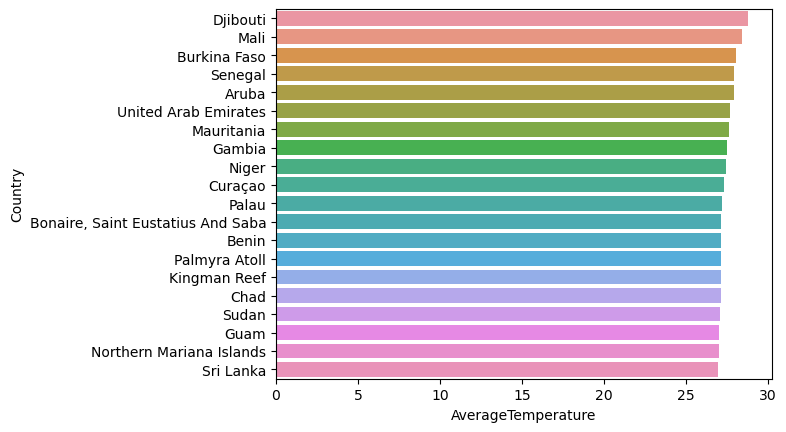

In [31]:
sns.barplot(x=avg_temp.sort_values(by='AverageTemperature',ascending=False)['AverageTemperature'][0:20],
            y=avg_temp.sort_values(by='AverageTemperature',ascending=False)['Country'][0:20])

# 4) Is there a global warming?

    Let's read the data from the "GlobalTemperatures.csv" file, which has a monthly Earth’s temperature and plot it on the chart.

In [32]:
global_temp = pd.read_csv(r"F:\Time_series_Analysis\2. Global_Warming\Dataset/GlobalTemperatures.csv")

In [33]:
global_temp.head(2)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
global_temp.dtypes

dt                                            object
LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
dtype: object

### now we have to extract year from 'dt' feature so that we can show trend for each of the year ,
    so first & foremost we have to extract year from 'dt feature'
    2 Ways to do it :
    a) convert 'dt' feature into date-time & then extract 'year' from it
    b) use your own code (its good for CS folk )
    

In [35]:
'''

def fetch_year(date):
    return date.split('-')[0]
global_temp['years']=global_temp['dt'].apply(fetch_year)


'''

"\n\ndef fetch_year(date):\n    return date.split('-')[0]\nglobal_temp['years']=global_temp['dt'].apply(fetch_year)\n\n\n"

In [36]:
## global_temp['years'] = global_temp['dt'].str.split('-').str[0]

In [37]:
### date-type of 'dt' must be 'Date-time' bcz it holds date-time values..

'''
in date-time , we have 2 data-type (datetime64[ns]) and (<M8[ns])
datetime64[ns] is a general dtype, while <M8[ns] is a specific dtype ,
ns is basicaly nano second..

M - is a type character code of "Datetime" ...





dtype='<M8[ns]' basically means :

## < represents byte order, small end （ the least significant byte is stored in the smallest address ）
## M is a type character code for Date-time data type
## 8 represents element bit length, data size , ie it can store 64 bytes data 



'''

'\nin date-time , we have 2 data-type (datetime64[ns]) and (<M8[ns])\ndatetime64[ns] is a general dtype, while <M8[ns] is a specific dtype ,\nns is basicaly nano second..\n\nM - is a type character code of "Datetime" ...\n\n\n\n\n\ndtype=\'<M8[ns]\' basically means :\n\n## < represents byte order, small end （ the least significant byte is stored in the smallest address ）\n## M is a type character code for Date-time data type\n## 8 represents element bit length, data size , ie it can store 64 bytes data \n\n\n\n'

In [38]:
pd.to_datetime(global_temp['dt']).dtype

dtype('<M8[ns]')

In [39]:
global_temp['years'] = pd.to_datetime(global_temp['dt']).dt.year

global_temp['month'] = pd.to_datetime(global_temp['dt']).dt.month

In [40]:
global_temp.head(1)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years,month
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1


In [41]:
global_temp.groupby('years').agg({'LandAverageTemperature':'mean','LandAverageTemperatureUncertainty':'mean'})

,LandAverageTemperature,LandAverageTemperatureUncertainty
years,,
1750,8.719364,2.637818
1751,7.976143,2.781143
1752,5.779833,2.977000
1753,8.388083,3.176000
1754,8.469333,3.494250
...,...,...
2011,9.516000,0.082000
2012,9.507333,0.083417
2013,9.606500,0.097667


In [42]:
temp_df = global_temp.groupby('years').agg({'LandAverageTemperature':'mean','LandAverageTemperatureUncertainty':'mean'}).reset_index()
temp_df.head()

,years,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750,8.719364,2.637818
1,1751,7.976143,2.781143
2,1752,5.779833,2.977000
3,1753,8.388083,3.176000
4,1754,8.469333,3.494250


In [43]:
### lets find out what can be the max uncertainity(Avg_temp + avg_uncertainity) 
### & what can be the least uncertainity(avg_temp - avg_uncertainity) in temp..

In [44]:
temp_df['Uncertainty_max'] = temp_df['LandAverageTemperature'] + temp_df['LandAverageTemperatureUncertainty']
temp_df['Uncertainty_min'] = temp_df['LandAverageTemperature'] - temp_df['LandAverageTemperatureUncertainty']

In [45]:
temp_df.head()

,years,LandAverageTemperature,LandAverageTemperatureUncertainty,Uncertainty_max,Uncertainty_min
0,1750,8.719364,2.637818,11.357182,6.081545
1,1751,7.976143,2.781143,10.757286,5.195000
2,1752,5.779833,2.977000,8.756833,2.802833
3,1753,8.388083,3.176000,11.564083,5.212083
4,1754,8.469333,3.494250,11.963583,4.975083


### lets plot line chart to show the trend :
    Ways to plot the line chart :
    a) pandas
    b) matplotlib
    c) seaborn 
    d) Plotly
    e) Pygal

In [46]:
temp_df.head()

,years,LandAverageTemperature,LandAverageTemperatureUncertainty,Uncertainty_max,Uncertainty_min
0,1750,8.719364,2.637818,11.357182,6.081545
1,1751,7.976143,2.781143,10.757286,5.195000
2,1752,5.779833,2.977000,8.756833,2.802833
3,1753,8.388083,3.176000,11.564083,5.212083
4,1754,8.469333,3.494250,11.963583,4.975083


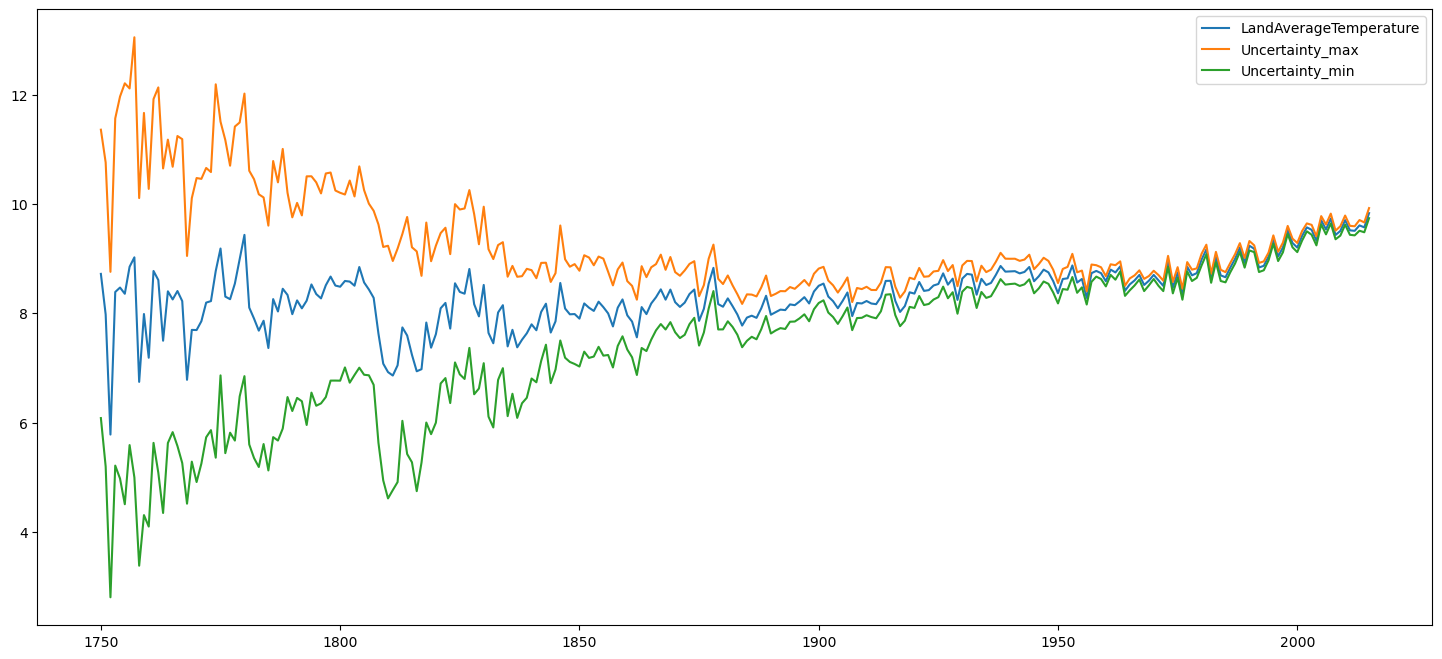

In [47]:
import matplotlib.pyplot as plt
 
plt.figure(figsize=(18, 8))
plt.plot(temp_df['years'], temp_df[['LandAverageTemperature', 'Uncertainty_max', 'Uncertainty_min']])
plt.legend(['LandAverageTemperature', 'Uncertainty_max', 'Uncertainty_min'])

    From the charts you can see, that there is global warming nowadays. The average temperature of Earth surface has the highest value in the last three centuries. The fastest temperature growth occurred in the last 30 years! This worries me, I hope soon humanity will fully switch to ecological sources of energy, that will reduce CO2. If it’s will not happened, 
    we will be in disaster. This charts also have confidence intervals, which shows that measurement of temperature 
    has become more accurate in the last few years.

# 5.. Analyse Average temperature in each season

In [48]:
### First & foremost we need season feature ,but since there 
## is no feature as 'season' hence we can think of extracting 
## it with the help of month feature using 'dt' feature..

In [49]:
global_temp.head(2)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years,month
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2


In [50]:
global_temp.shape

(3192, 11)

In [51]:
#global_temp.drop('dt', axis=1, inplace=True)

In [52]:
global_temp.head(2)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years,month
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2


In [53]:
global_temp.dtypes

dt                                            object
LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
years                                          int64
month                                          int64
dtype: object

### now using month ,we can extract what my season is :
    There are couple of ways to do it:
        a) using function 
        b) using loops
        c) using discretization :(pd.cut) (follow DA_airnb_nyc.ipynb) - 8 ways 
        
        Note: For Readibility,functions are better if we have many 
             conditions,but for optimal code perspective,
             lambda have an edge.

In [54]:
def get_season(month):
    if month >= 3 and month <= 5:
        return 'spring'
    elif month >= 6 and month <= 8:
        return 'summer'
    elif month >= 9 and month <= 11:
        return 'autumn'
    else:
        return 'winter'

In [55]:
global_temp['season'] = global_temp['month'].apply(get_season)

In [56]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years,month,season
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1,winter
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2,winter
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,3,spring
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750,4,spring
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750,5,spring


In [57]:
### We say for each the year , just find avg_summer temp , avg_autumn temp ,avg_winter_temp & avg_spring_temp..

In [58]:
### So first ,we have to find all the unique yrs in my dataframe
years = global_temp['years'].unique()

In [59]:
### Then we have to store temp of all 4 season  ,
## hence we have to define 4 new list to store it..

spring_temps = []
summer_temps = []
autumn_temps = []
winter_temps = []


## Then for each of the year ,I have to extract various season 
## temperature ,hence idea of for loop will be handy here

for year in years:
    current_yr_df = global_temp[global_temp['years']==year]
    spring_temps.append(current_yr_df[current_yr_df['season'] == 'spring']\
                        ['LandAverageTemperature'].mean())
    summer_temps.append(current_yr_df[current_yr_df['season'] == 'summer']\
                        ['LandAverageTemperature'].mean())
    autumn_temps.append(current_yr_df[current_yr_df['season'] == 'autumn']\
                        ['LandAverageTemperature'].mean())
    winter_temps.append(current_yr_df[current_yr_df['season'] == 'winter']\
                        ['LandAverageTemperature'].mean())
    

In [60]:
### lets make a dataframe of it
season = pd.DataFrame()
season['year'] = years
season['spring_temp'] = spring_temps
season['summer_temp'] = summer_temps
season['autumn_temp'] = autumn_temps
season['winter_temp'] = winter_temps

In [61]:
season.head()

,year,spring_temp,summer_temp,autumn_temp,winter_temp
0,1750,8.563000,14.518333,8.890000,2.963000
1,1751,6.735000,14.116000,10.673000,1.729000
2,1752,7.035500,NaN,7.587000,2.717000
3,1753,8.627333,14.608333,9.212333,1.104333
4,1754,9.074333,14.208333,8.957333,1.637333


In [62]:
season.columns

Index(['year', 'spring_temp', 'summer_temp', 'autumn_temp', 'winter_temp'], dtype='object')

### lets use plot line chart to show the trend :
    Ways to plot the line chart :
    a) pandas
    b) matplotlib
    c) seaborn 
    d) Plotly
    e) Pygal

In [ ]:
## in the last plot , we have shown u how to build lineplot 
## using matplotlib , so this time let me show u using Pandas ..

<AxesSubplot:xlabel='year'>

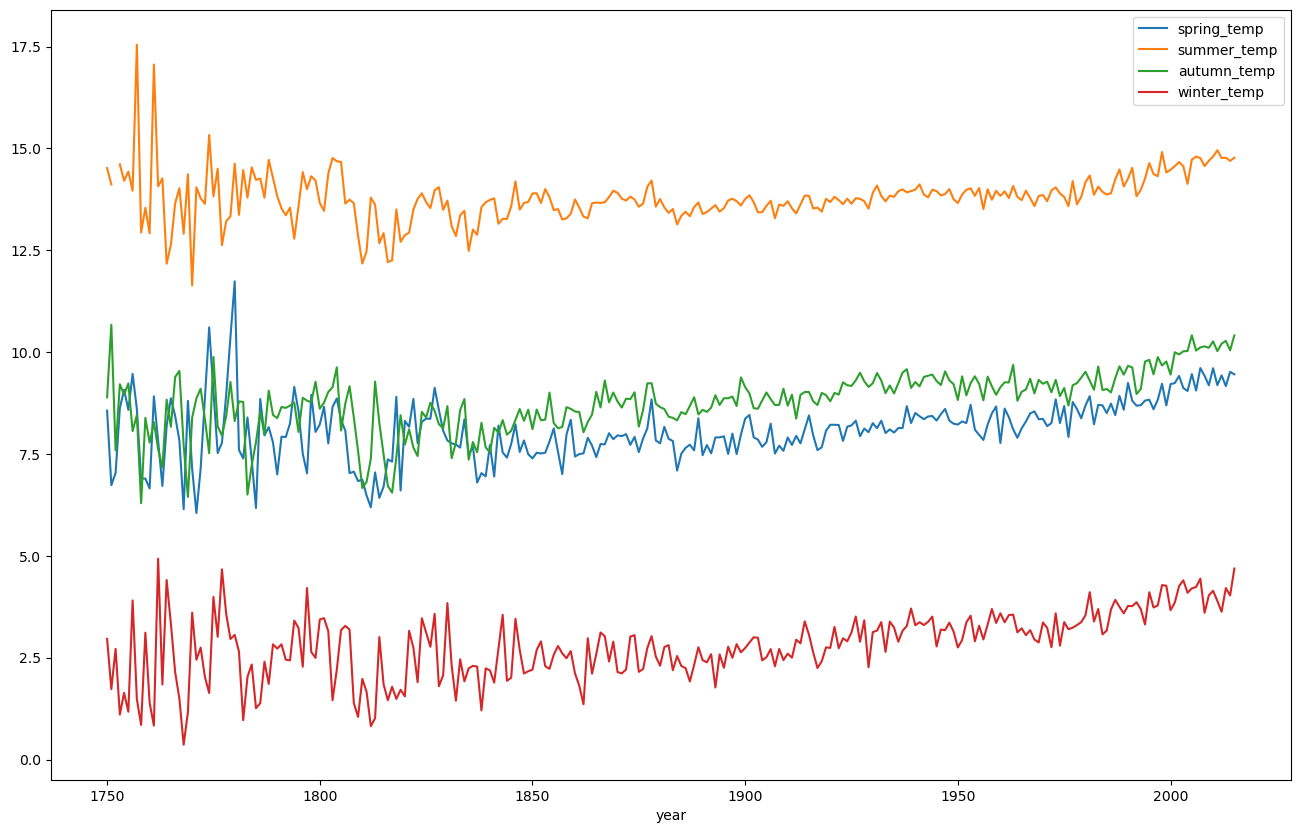

In [63]:
### using Pandas
season.plot(x='year', y=['spring_temp', 'summer_temp', \
             'autumn_temp', 'winter_temp'],figsize=(16,10))

In [64]:
'''
import plotly.express as px
fig=px.line(season,x="year",y=['spring_temp', 'summer_temp', 'autumn_temp', 'winter_temp'],title="Average Temperature in Each season", template="plotly_dark")
fig.show()
'''

'\nimport plotly.express as px\nfig=px.line(season,x="year",y=[\'spring_temp\', \'summer_temp\', \'autumn_temp\', \'winter_temp\'],title="Average Temperature in Each season", template="plotly_dark")\nfig.show()\n'

### Is it getting warmer? Yes, it is. (bcz the trend is going 
        up ,ie temperature is increasing )

# 6.. Analyse Trend In Temperatures for some of the Top Economies of World

    Let’s look at the chart of annual temperature changes in certain continents 
    (we take into consideration one country per continent 
    and mark Greenland as the coldest place on Earth).

In [65]:
top_economies = ['Russia', 'United States', 'China', 'Japan', \
                 'Australia', 'India']

In [66]:
global_temp_country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [67]:
global_temp_country[global_temp_country['Country'].isin(top_economies)]

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
34816,1852-07-01,14.116,1.530,Australia
34817,1852-08-01,15.330,1.400,Australia
34818,1852-09-01,18.740,1.446,Australia
34819,1852-10-01,21.984,1.493,Australia
34820,1852-11-01,24.073,1.466,Australia
...,...,...,...,...
557816,2013-05-01,14.073,0.178,United States
557817,2013-06-01,20.198,0.236,United States
557818,2013-07-01,22.074,0.152,United States
557819,2013-08-01,21.168,0.249,United States


In [68]:
continent_df = global_temp_country[global_temp_country['Country'].\
                                   isin(top_economies)]

In [69]:
continent_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
34816,1852-07-01,14.116,1.530,Australia
34817,1852-08-01,15.330,1.400,Australia
34818,1852-09-01,18.740,1.446,Australia
34819,1852-10-01,21.984,1.493,Australia
34820,1852-11-01,24.073,1.466,Australia


In [70]:
continent_df.shape

(14301, 4)

In [ ]:
### now we have to extract year :
## In one of the earlier session , we have shown u datetime 
## approach ie dt.year approach to extract year ..

## now let me show u one more way to extract year ..

In [71]:
continent_df['dt']

34816     1852-07-01
34817     1852-08-01
34818     1852-09-01
34819     1852-10-01
34820     1852-11-01
             ...    
557816    2013-05-01
557817    2013-06-01
557818    2013-07-01
557819    2013-08-01
557820    2013-09-01
Name: dt, Length: 14301, dtype: object

In [72]:
type(continent_df['dt'][34816])

## since each value is string in nature , hence u can use 
## string functions to extract year ..

## In pandas , u can use .str accessor to access all the string functions ..

str

In [73]:
continent_df['dt'].str.split('-').str[0]

34816     1852
34817     1852
34818     1852
34819     1852
34820     1852
          ... 
557816    2013
557817    2013
557818    2013
557819    2013
557820    2013
Name: dt, Length: 14301, dtype: object

In [74]:
continent_df['years'] = continent_df['dt'].str.split('-').str[0]

In [75]:
continent_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,years
34816,1852-07-01,14.116,1.530,Australia,1852
34817,1852-08-01,15.330,1.400,Australia,1852
34818,1852-09-01,18.740,1.446,Australia,1852
34819,1852-10-01,21.984,1.493,Australia,1852
34820,1852-11-01,24.073,1.466,Australia,1852


In [76]:
continent_df.groupby(['years','Country']).agg({'AverageTemperature':\
                                               'mean'})

AverageTemperature
years Country                          
1768  United States            5.572750
1769  United States           10.446500
1770  United States                 NaN
1771  United States                 NaN
1772  United States                 NaN
...                                 ...
2013  China                    9.295000
      India                   25.413250
      Japan                   12.964750
      Russia                  -2.263125
      United States           11.297111

[1195 rows x 1 columns]

In [77]:
avg_temp = continent_df.groupby(['years','Country']).agg(\
                 {'AverageTemperature':'mean'}).reset_index()

avg_temp.head(10)

,years,Country,AverageTemperature
0,1768,United States,5.572750
1,1769,United States,10.446500
2,1770,United States,NaN
3,1771,United States,NaN
4,1772,United States,NaN
5,1773,United States,NaN
6,1774,United States,1.603000
7,1775,United States,9.499167
8,1776,United States,8.110000
9,1777,United States,8.304750


In [79]:
avg_temp.shape

(1195, 3)

### lets use plot line chart to show the trend :
    Ways to plot the line chart :
    a) pandas
    b) matplotlib
    c) seaborn 
    d) Plotly
    e) Pygal

In [ ]:
### Since we have drawn lineplot using matplotlib & Pandas in the 
## previous session ,

## So in this session , let me show you how to do it using plotly..

In [ ]:
### For seaborn : returning error as : Could not interpret 'country' on hue
# sns.lineplot(avg_temp['years'] , avg_temp['AverageTemperature'] , hue='Country')

In [78]:
import plotly.express as px
fig = px.line(avg_temp , x = "years", y = ["AverageTemperature"] , \
              color='Country' , title="Average Land Temperature in World" , \
              template="plotly_dark")
fig.show()


## Since each country have different colour of lineplot , so lets mention color='Country'..

### Conclusion-->> We will see that  there has been a global increase 
    trend in temperature, particularly over the last 30 years. 
    This is due to the violent activities of a humankind. 

# 7.. Extracting latitudes & longitudes of State of USA !

In [ ]:
### lets first read state-wise data so that we are able to extract
## geographical co-ordinates for every state..

In [80]:
global_temp_state = pd.read_csv(r'F:\Time_series_Analysis\\
        2. Global_Warming\Dataset/GlobalLandTemperaturesByState.csv')

In [81]:
global_temp_state['Country'].unique()

array(['Brazil', 'Russia', 'United States', 'Canada', 'India', 'China',
       'Australia'], dtype=object)

In [82]:
USA = global_temp_state[global_temp_state['Country']==\
                        'United States']

### let me show you how u can extract graphical co-ordinates for 
## states for US, because if u are able to do it for 1 country
## u can do it for other country as well !

In [83]:
USA.shape

(149745, 5)

In [84]:
USA.isna().sum()

dt                                  0
AverageTemperature               7815
AverageTemperatureUncertainty    7815
State                               0
Country                             0
dtype: int64

In [6]:
# USA.dropna(inplace=True)

C:\Users\mcr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
### lets figure out whether we have duplicacy in state name or not 
## or whether States are written properly or not so that

## it makes things simple for us to extract latitudes & longitudes..

In [85]:
USA['State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District Of Columbia',
       'Florida', 'Georgia (State)', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [86]:
state_dict = {'Georgia (State)':'Georgia',\
              'District Of Columbia':'Columbia'}

In [87]:
USA['State'].replace(state_dict,inplace=True)

In [88]:
USA['State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Columbia', 'Florida',
       'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
       'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [89]:
USA.head(2)

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
7458,1743-11-01,10.722,2.898,Alabama,United States
7459,1743-12-01,NaN,NaN,Alabama,United States


In [ ]:
### lets make "Alabama" as "Alabama , USA"  for better 
## readibility & in order to appropriate right lat & lon ..

In [44]:
# us = USA.copy()

In [90]:
USA['State'] = USA['State'] + ' , United States'

In [10]:
# USA=USA[['AverageTemperature','State']]

In [91]:
USA['State'].unique()

array(['Alabama , United States', 'Alaska , United States',
       'Arizona , United States', 'Arkansas , United States',
       'California , United States', 'Colorado , United States',
       'Connecticut , United States', 'Delaware , United States',
       'Columbia , United States', 'Florida , United States',
       'Georgia , United States', 'Hawaii , United States',
       'Idaho , United States', 'Illinois , United States',
       'Indiana , United States', 'Iowa , United States',
       'Kansas , United States', 'Kentucky , United States',
       'Louisiana , United States', 'Maine , United States',
       'Maryland , United States', 'Massachusetts , United States',
       'Michigan , United States', 'Minnesota , United States',
       'Mississippi , United States', 'Missouri , United States',
       'Montana , United States', 'Nebraska , United States',
       'Nevada , United States', 'New Hampshire , United States',
       'New Jersey , United States', 'New Mexico , United S

In [92]:
pd.DataFrame({'State': USA['State'].unique()} )

,State
0,"Alabama , United States"
1,"Alaska , United States"
2,"Arizona , United States"
3,"Arkansas , United States"
4,"California , United States"
5,"Colorado , United States"
6,"Connecticut , United States"
7,"Delaware , United States"
8,"Columbia , United States"
9,"Florida , United States"


In [93]:
USA_states = pd.DataFrame({'State': USA['State'].unique()})

In [94]:
USA_states.head(2)

,State
0,"Alabama , United States"
1,"Alaska , United States"


In [91]:
## USA_temp = USA.groupby('State')['AverageTemperature'].mean().reset_index()

In [95]:
USA_states.shape

(51, 1)

In [ ]:
### now lets extract latitudes & Longitudes of data so that we can plot some maps..

#### ways to extract lat & lang..
    1.. using geopy
    2.. using opencage 

In [ ]:
### since we have learnt how to extract using geopy , 
## lets learn using opencage !

In [2]:
# !pip install opencage
## previous version was - opencage-1.2.2 

## latest - 2.3.0

     ---------------------------------------- 62.6/62.6 kB 1.1 MB/s eta 0:00:00
  Using cached backoff-2.2.1-py3-none-any.whl (15 kB)
  Attempting uninstall: Requests
    Found existing installation: requests 2.28.1
    Uninstalling requests-2.28.1:
      Successfully uninstalled requests-2.28.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.
conda-repo-cli 1.0.20 requires requests==2.28.1, but you have requests 2.31.0 which is incompatible.


In [96]:
import opencage
from opencage.geocoder import OpenCageGeocode

In [97]:
opencage.__version__

'2.3.0'

In [98]:
key = '5ca89e8267cb476a88cd247f5d0dc35d'  

# get api key from:  https://opencagedata.com/api

## sign in using google account  , 
## go to geocoding API & get your api key ...


geocoder = OpenCageGeocode(key)
query = 'Bijuesca, Spain'  
results = geocoder.geocode(query)
print (results)

[{'annotations': {'DMS': {'lat': "41° 32' 25.83312'' N", 'lng': "1° 55' 13.28232'' W"}, 'MGRS': '30TWL9005499324', 'Maidenhead': 'IN91am99nr', 'Mercator': {'x': -213773.074, 'y': 5064053.763}, 'NUTS': {'NUTS0': {'code': 'ES'}, 'NUTS1': {'code': 'ES2'}, 'NUTS2': {'code': 'ES24'}, 'NUTS3': {'code': 'ES243'}}, 'OSM': {'edit_url': 'https://www.openstreetmap.org/edit?relation=342295#map=17/41.54051/-1.92036', 'note_url': 'https://www.openstreetmap.org/note/new#map=17/41.54051/-1.92036&layers=N', 'url': 'https://www.openstreetmap.org/?mlat=41.54051&mlon=-1.92036#map=17/41.54051/-1.92036'}, 'UN_M49': {'regions': {'ES': '724', 'EUROPE': '150', 'SOUTHERN_EUROPE': '039', 'WORLD': '001'}, 'statistical_groupings': ['MEDC']}, 'callingcode': 34, 'currency': {'alternate_symbols': [], 'decimal_mark': ',', 'html_entity': '€', 'iso_code': 'EUR', 'iso_numeric': '978', 'name': 'Euro', 'smallest_denomination': 1, 'subunit': 'Cent', 'subunit_to_unit': 100, 'symbol': '€', 'symbol_first': 0, 'thousands_separa

In [99]:
results[0]
## results is a list of dictionary in which we have all the 
## data at 0th index.. so lets access data as results[0]

{'annotations': {'DMS': {'lat': "41° 32' 25.83312'' N",
   'lng': "1° 55' 13.28232'' W"},
  'MGRS': '30TWL9005499324',
  'Maidenhead': 'IN91am99nr',
  'Mercator': {'x': -213773.074, 'y': 5064053.763},
  'NUTS': {'NUTS0': {'code': 'ES'},
   'NUTS1': {'code': 'ES2'},
   'NUTS2': {'code': 'ES24'},
   'NUTS3': {'code': 'ES243'}},
  'OSM': {'edit_url': 'https://www.openstreetmap.org/edit?relation=342295#map=17/41.54051/-1.92036',
   'note_url': 'https://www.openstreetmap.org/note/new#map=17/41.54051/-1.92036&layers=N',
   'url': 'https://www.openstreetmap.org/?mlat=41.54051&mlon=-1.92036#map=17/41.54051/-1.92036'},
  'UN_M49': {'regions': {'ES': '724',
    'EUROPE': '150',
    'SOUTHERN_EUROPE': '039',
    'WORLD': '001'},
   'statistical_groupings': ['MEDC']},
  'callingcode': 34,
  'currency': {'alternate_symbols': [],
   'decimal_mark': ',',
   'html_entity': '€',
   'iso_code': 'EUR',
   'iso_numeric': '978',
   'name': 'Euro',
   'smallest_denomination': 1,
   'subunit': 'Cent',
   'su

In [102]:
lat = results[0]['geometry']['lat']
lon = results[0]['geometry']['lng']
print (lat, lon)

41.5405092 -1.9203562


In [103]:
USA_states['State'].head()

0       Alabama , United States
1        Alaska , United States
2       Arizona , United States
3      Arkansas , United States
4    California , United States
Name: State, dtype: object

In [104]:
## takes 1- 2 min 

list_lat = []
list_long = []

for state in USA_states['State']: # iterate over State feature in dataframe
    results = geocoder.geocode(state)   
    lat = results[0]['geometry']['lat']
    lon = results[0]['geometry']['lng']
    try :
        list_lat.append(lat)
        list_long.append(lon)
    except:
        list_lat.append(np.nan)
        list_lat.append(np.nan)
    
    
    ## adding try-except(exception handling) is good to do in loops ..

In [105]:
# create new columns from lists    

USA_states['lat'] = list_lat   
USA_states['lon'] = list_long

In [106]:
USA_states.head(2)

,State,lat,lon
0,"Alabama , United States",33.258882,-86.829534
1,"Alaska , United States",64.445961,-149.680909


# 8.. Plotting all the various States of USA 
        Plotting all the various States of USA using the dataset !

In [ ]:
## !pip install folium

In [107]:
import folium

In [108]:
m = folium.Map(zoom_start=12) 

## it will create a basemap of entire world ..

In [109]:
m

In [110]:
# Add points to the map
# as we have used pandas iterrows() in zomato , 
# so lets use zip() functionality this time .. 

for state,lat,lon in zip(USA_states['State'] , USA_states['lat'] , \
                         USA_states['lon']):
    
    folium.Marker([lat,lon], popup=state).add_to(m)

In [111]:
m

## 9.. Visualising avg. Temperatures of USA State !

In [ ]:
## try out choropleth map as well ..

In [112]:
USA_states.head()

,State,lat,lon
0,"Alabama , United States",33.258882,-86.829534
1,"Alaska , United States",64.445961,-149.680909
2,"Arizona , United States",34.395342,-111.763275
3,"Arkansas , United States",35.204888,-92.447911
4,"California , United States",36.701463,-118.755997


In [114]:
USA.head(4)

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
7458,1743-11-01,10.722,2.898,"Alabama , United States",United States
7459,1743-12-01,NaN,NaN,"Alabama , United States",United States
7460,1744-01-01,NaN,NaN,"Alabama , United States",United States
7461,1744-02-01,NaN,NaN,"Alabama , United States",United States


In [115]:
usa_avg_temp = USA.groupby('State')['AverageTemperature'].mean().\
                reset_index()

In [116]:
usa_avg_temp.head(2)

,State,AverageTemperature
0,"Alabama , United States",17.066138
1,"Alaska , United States",-4.890738


In [117]:
USA_states_avg_temp = USA_states.merge(usa_avg_temp , \
                                       on='State')

In [118]:
USA_states_avg_temp.head(2)

,State,lat,lon,AverageTemperature
0,"Alabama , United States",33.258882,-86.829534,17.066138
1,"Alaska , United States",64.445961,-149.680909,-4.890738


In [153]:
import folium
from folium.plugins import HeatMap
basemap = folium.Map()

In [154]:
basemap

In [120]:
HeatMap(USA_states_avg_temp[['lat','lon','AverageTemperature']], \
        zoom=20, radius=15).add_to(basemap)
basemap

## 10.. Choropleth map of avg. Temperatures of USA State !
    Lets make choropleth map of above prblm statement as 
    choropleth map makes more sense here !

In [121]:
USA_states_avg_temp.columns

Index(['State', 'lat', 'lon', 'AverageTemperature'], dtype='object')

In [122]:
USA_states_avg_temp.head(4)

,State,lat,lon,AverageTemperature
0,"Alabama , United States",33.258882,-86.829534,17.066138
1,"Alaska , United States",64.445961,-149.680909,-4.890738
2,"Arizona , United States",34.395342,-111.763275,15.381526
3,"Arkansas , United States",35.204888,-92.447911,15.573963


In [123]:
USA_states_avg_temp['State'].unique()

array(['Alabama , United States', 'Alaska , United States',
       'Arizona , United States', 'Arkansas , United States',
       'California , United States', 'Colorado , United States',
       'Connecticut , United States', 'Delaware , United States',
       'Columbia , United States', 'Florida , United States',
       'Georgia , United States', 'Hawaii , United States',
       'Idaho , United States', 'Illinois , United States',
       'Indiana , United States', 'Iowa , United States',
       'Kansas , United States', 'Kentucky , United States',
       'Louisiana , United States', 'Maine , United States',
       'Maryland , United States', 'Massachusetts , United States',
       'Michigan , United States', 'Minnesota , United States',
       'Mississippi , United States', 'Missouri , United States',
       'Montana , United States', 'Nebraska , United States',
       'Nevada , United States', 'New Hampshire , United States',
       'New Jersey , United States', 'New Mexico , United S

In [ ]:
### in the locations parameter of px.choropleth() , 
## we have to mention locations ie state , but in the form of 
## state abbreviation name ,ie we have to mention its abbreviations , 

eg AL for Alabama 

In [114]:
### lets read json file "state_abb.json" , 

## which have values as : {'Alabama , United States': 'AK'}

In [124]:
import json

In [125]:
f = open(r'F:\Time_series_Analysis\2. Global_Warming\Dataset/s\
        tate_abb.json')

In [126]:
# returns JSON object as 
# a dictionary
dict_st = json.load(f)

In [128]:
dict_st

{'Alabama , United States': 'AK',
 'Alaska , United States': 'AL',
 'Arizona , United States': 'AZ',
 'Arkansas , United States': 'AR',
 'California , United States': 'SC',
 'Colorado , United States': 'CO',
 'Connecticut , United States': 'CT',
 'Delaware , United States': 'DE',
 'Columbia , United States': 'cu',
 'Florida , United States': 'FL',
 'Georgia , United States': 'GA',
 'Hawaii , United States': 'HI',
 'Idaho , United States': 'ID',
 'Illinois , United States': 'IL',
 'Indiana , United States': 'IN',
 'Iowa , United States': 'IA',
 'Kansas , United States': 'KS',
 'Kentucky , United States': 'KY',
 'Louisiana , United States': 'LA',
 'Maine , United States': 'ME',
 'Maryland , United States': 'MD',
 'Massachusetts , United States': 'MA',
 'Michigan , United States': 'MI',
 'Minnesota , United States': 'MN',
 'Mississippi , United States': 'MS',
 'Missouri , United States': 'MO',
 'Montana , United States': 'MT',
 'Nebraska , United States': 'NE',
 'Nevada , United States': 

In [129]:
USA_states_avg_temp['State'].map(dict_st)

0     AK
1     AL
2     AZ
3     AR
4     SC
5     CO
6     CT
7     DE
8     cu
9     FL
10    GA
11    HI
12    ID
13    IL
14    IN
15    IA
16    KS
17    KY
18    LA
19    ME
20    MD
21    MA
22    MI
23    MN
24    MS
25    MO
26    MT
27    NE
28    NV
29    NH
30    NJ
31    NM
32    NY
33    NC
34    ND
35    OH
36    OK
37    OR
38    PA
39    RI
40    SC
41    SD
42    TN
43    TX
44    UT
45    VT
46    VA
47    WA
48    WV
49    WI
50    WY
Name: State, dtype: object

In [130]:
USA_states_avg_temp['State_abb'] = USA_states_avg_temp['State'].\
                                map(dict_st)

In [131]:
USA_states_avg_temp.head(2)

,State,lat,lon,AverageTemperature,State_abb
0,"Alabama , United States",33.258882,-86.829534,17.066138,AK
1,"Alaska , United States",64.445961,-149.680909,-4.890738,AL


#### https://abbreviations.yourdictionary.com/articles/state-abbrev.html

In [132]:
fig = px.choropleth(USA_states_avg_temp , \
                    locations=USA_states_avg_temp['State_abb'], \
                    locationmode='USA-states', \
                    color='AverageTemperature' , \
                    scope="usa")

### for locationmode ,go to documentation :

fig.update_layout(title='Choropleth Map of AverageTemperature in USA ',\
                  template="plotly_dark")

fig.show()

In [ ]:
'''

locationmode (str) – Either ‘ISO-3’, or ‘USA-states’, or ‘country names’ 
                    ie it Determines the set of locations used to 
                match entries in locations to regions on the map.



scope (str (default 'world').) – Either 'world', 'usa', 'europe', 'asia', 
                            'africa', 'north america', or 'south america'
                            
                `Default is `'world' unless projection is set to 
                'albers usa', which forces 'usa'.

'''

## 11.. Analyse Average Temperature Of Major Indian Cities By Month ..
    Since Temp keeps on changing in every month in India , hence using geographical heatmap will make sense 
    but not upto greater extent , So lets use simple Heatmap which tells how temperature is changing 
    in each month in various Indian Cities !

In [ ]:
### lets read GlobalLandTemperaturesByCity.csv which tells city wise data ..

In [133]:
cities = pd.read_csv(r'F:\Time_series_Analysis\2. Global_Warming\Dataset/GlobalLandTemperaturesByCity.csv') ## takes 1 min 

In [134]:
cities.head(2)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [135]:
cities.shape

(8599212, 7)

In [136]:
cities['Country'].unique()

array(['Denmark', 'Turkey', 'Kazakhstan', 'China', 'Spain', 'Germany',
       'Nigeria', 'Iran', 'Russia', 'Canada', "Côte D'Ivoire",
       'United Kingdom', 'Saudi Arabia', 'Japan', 'United States',
       'India', 'Benin', 'United Arab Emirates', 'Mexico', 'Venezuela',
       'Ghana', 'Ethiopia', 'Australia', 'Yemen', 'Indonesia', 'Morocco',
       'Pakistan', 'France', 'Libya', 'Burma', 'Brazil', 'South Africa',
       'Syria', 'Egypt', 'Algeria', 'Netherlands', 'Malaysia', 'Portugal',
       'Ecuador', 'Italy', 'Uzbekistan', 'Philippines', 'Madagascar',
       'Chile', 'Belgium', 'El Salvador', 'Romania', 'Peru', 'Colombia',
       'Tanzania', 'Tunisia', 'Turkmenistan', 'Israel', 'Eritrea',
       'Paraguay', 'Greece', 'New Zealand', 'Vietnam', 'Cameroon', 'Iraq',
       'Afghanistan', 'Argentina', 'Azerbaijan', 'Moldova', 'Mali',
       'Congo (Democratic Republic Of The)', 'Thailand',
       'Central African Republic', 'Bosnia And Herzegovina', 'Bangladesh',
       'Switzerland'

In [137]:
India_df = cities[cities['Country']=='India']

In [138]:
India_df['City'].unique()

array(['Abohar', 'Achalpur', 'Adilabad', 'Adoni', 'Agartala', 'Agra',
       'Ahmadabad', 'Ahmadnagar', 'Aizawl', 'Ajmer', 'Akola', 'Alandur',
       'Alappuzha', 'Aligarh', 'Allahabad', 'Alwar', 'Ambala',
       'Ambarnath', 'Ambattur', 'Ambur', 'Amravati', 'Amritsar', 'Amroha',
       'Anand', 'Anantapur', 'Ara', 'Asansol', 'Aurangabad', 'Avadi',
       'Azamgarh', 'Badlapur', 'Bagaha', 'Bahadurgarh', 'Baharampur',
       'Bahraich', 'Baidyabati', 'Baleshwar', 'Ballia', 'Bally',
       'Balurghat', 'Banda', 'Bangalore', 'Bangaon', 'Bankura',
       'Bansbaria', 'Barakpur', 'Baranagar', 'Barasat', 'Barddhaman',
       'Bareli', 'Baripada', 'Barnala', 'Barsi', 'Basirhat', 'Basti',
       'Batala', 'Beawar', 'Begusarai', 'Belgaum', 'Bellary', 'Bettiah',
       'Bhadravati', 'Bhadreswar', 'Bhagalpur', 'Bharatpur', 'Bharuch',
       'Bhatpara', 'Bhavnagar', 'Bhilai', 'Bhilwara', 'Bhimavaram',
       'Bhind', 'Bhiwandi', 'Bhiwani', 'Bhopal', 'Bhubaneswar', 'Bhuj',
       'Bhusawal', 'Bid',

In [139]:
Cities_list = ['New Delhi','Bombay' , 'Bangalore','Hyderabad','Varanasi','Gurgaon']

## Lets consider some famous or popular cities ..

In [141]:
indian_cities = India_df[India_df['City'].isin(Cities_list)]

In [142]:
indian_cities.shape

(15678, 7)

In [143]:
indian_cities.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
630113,1796-01-01,22.672,2.317,Bangalore,India,12.05N,77.26E
630114,1796-02-01,24.420,1.419,Bangalore,India,12.05N,77.26E
630115,1796-03-01,26.092,2.459,Bangalore,India,12.05N,77.26E
630116,1796-04-01,27.687,1.746,Bangalore,India,12.05N,77.26E
630117,1796-05-01,27.619,1.277,Bangalore,India,12.05N,77.26E


In [144]:
## remove N & E from "lat" & "Lon"

indian_cities['Latitude'] = indian_cities['Latitude'].str.strip('N')
indian_cities['Longitude'] = indian_cities['Longitude'].str.strip('E')

In [145]:
indian_cities.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
630113,1796-01-01,22.672,2.317,Bangalore,India,12.05,77.26
630114,1796-02-01,24.420,1.419,Bangalore,India,12.05,77.26
630115,1796-03-01,26.092,2.459,Bangalore,India,12.05,77.26
630116,1796-04-01,27.687,1.746,Bangalore,India,12.05,77.26
630117,1796-05-01,27.619,1.277,Bangalore,India,12.05,77.26


In [ ]:
indian_cities['dt']

In [146]:
indian_cities['dt'] = pd.to_datetime(indian_cities['dt'])

In [ ]:
indian_cities['dt']

In [147]:
indian_cities['Month'] = indian_cities['dt'].dt.month
# cities.drop('dt',axis=1,inplace=True)

In [148]:
indian_cities.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Month
630113,1796-01-01,22.672,2.317,Bangalore,India,12.05,77.26,1
630114,1796-02-01,24.420,1.419,Bangalore,India,12.05,77.26,2
630115,1796-03-01,26.092,2.459,Bangalore,India,12.05,77.26,3
630116,1796-04-01,27.687,1.746,Bangalore,India,12.05,77.26,4
630117,1796-05-01,27.619,1.277,Bangalore,India,12.05,77.26,5


In [149]:
indian_cities.groupby(['Month','City'])['AverageTemperature'].mean()

Month  City     
1      Bangalore    22.713981
       Bombay       24.192095
       Gurgaon      14.238560
       Hyderabad    22.758290
       New Delhi    14.238560
       Varanasi     15.596651
2      Bangalore    24.656619
       Bombay       24.039886
       Gurgaon      17.144980
       Hyderabad    25.317076
       New Delhi    17.144980
       Varanasi     18.716421
3      Bangalore    27.062186
       Bombay       25.673476
       Gurgaon      23.014804
       Hyderabad    28.803543
       New Delhi    23.014804
       Varanasi     24.651115
4      Bangalore    27.988517
       Bombay       27.413802
       Gurgaon      29.004576
       Hyderabad    31.465565
       New Delhi    29.004576
       Varanasi     30.190039
5      Bangalore    27.522754
       Bombay       28.902565
       Gurgaon      33.297051
       Hyderabad    32.702005
       New Delhi    33.297051
       Varanasi     33.313519
6      Bangalore    25.468799
       Bombay       28.271756
       Gurgaon      33.

In [150]:
indian_cities.groupby(['Month','City'])['AverageTemperature'].mean().unstack()

City,Bangalore,Bombay,Gurgaon,Hyderabad,New Delhi,Varanasi
Month,,,,,,
1,22.713981,24.192095,14.238560,22.758290,14.238560,15.596651
2,24.656619,24.039886,17.144980,25.317076,17.144980,18.716421
3,27.062186,25.673476,23.014804,28.803543,23.014804,24.651115
4,27.988517,27.413802,29.004576,31.465565,29.004576,30.190039
5,27.522754,28.902565,33.297051,32.702005,33.297051,33.313519
6,25.468799,28.271756,33.866005,29.968469,33.866005,32.570742
7,24.400481,27.078729,31.174114,27.216586,31.174114,29.612919
8,24.362910,26.619448,29.752423,26.573533,29.752423,28.588162
9,24.495115,26.861770,28.994465,26.640239,28.994465,28.238005


<AxesSubplot:xlabel='City', ylabel='Month'>

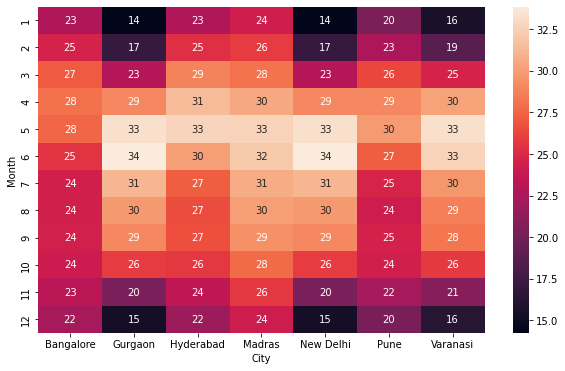

In [200]:
plt.figure(figsize=(10,6))
sns.heatmap(indian_cities.groupby(['Month','City'])['AverageTemperature'].mean().unstack() , annot=True)